# Projeto de Análise de Redes

# Explicando Dataset

## O que é
O dataset é uma rede de usuários da LastFM, uma rede social com foco em música. Foi obtido em [https://snap.stanford.edu/data/feather-lastfm-social.html](https://snap.stanford.edu/data/feather-lastfm-social.html) e é composto por 7624 nós e 27806 arestas.


## O que são os nós e arestas
Os nós são os usuários da rede e as arestas são as conexões entre eles. As conexões são feitas quando um usuário adiciona outro como amigo, de forma mútua. Ou seja, se o usuário A adiciona o usuário B como amigo, o usuário B também adiciona o usuário A como amigo.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar grafo
grafo = pd.read_csv('lastfm_asia_edges.csv')
G = nx.Graph()
G = nx.from_pandas_edgelist(grafo, create_using=nx.Graph())
# Quantidade de nós e arestas
print('Quantidade de nós: ', G.number_of_nodes())
print('Quantidade de arestas: ', G.number_of_edges())

Quantidade de nós:  7624
Quantidade de arestas:  27806


Mesmo que não se tenha dado percebido a necessidade de se gerar um subgrafo, foi gerado um subgrafo com os 1000 primeiros nós e suas arestas. Isso foi feito para que a análise fosse mais rápida e para que se pudesse visualizar melhor os resultados.

In [4]:
# Gerando subgrafo
subgrafo = G.subgraph(list(G.nodes())[0:1000])
print('Quantidade de nós do subgrafo: ', subgrafo.number_of_nodes())
print('Quantidade de arestas do subgrafo: ', subgrafo.number_of_edges())

Quantidade de nós do subgrafo:  1000
Quantidade de arestas do subgrafo:  4626


Abaixo temos a visualização da matriz de adjacência do grafo completo e do subgrafo.

# Matriz de adjacência

A matriz de adjacência gerada mostra a relação entre os nós. Se o valor da posição (i, j) for 1, significa que o nó i é amigo do nó j. Se o valor for 0, significa que não são amigos. Podemos ver então que a rede é mais densa para os primeiros nós e vai ficando mais esparsa conforme os nós vão aumentando.

No contexto da rede isso significa que os primeiros nós, que são a parte mais densa da rede, são os usuários mais populares, que tem mais amigos. Já os últimos nós, que são a parte mais esparsa da rede, são os usuários menos populares, que tem menos amigos.

Isso significa que na rede da LastFM, temos uma distribuição de popularidade entre os usuários, onde alguns são mais populares e tem mais amigos e outros são menos populares e tem menos amigos, o que é esperado em uma rede social. Além disso, podemos ver que a rede é conexa, ou seja, todos os nós estão conectados.

# Diâmetro e periferia da rede

Calculando o diâmetro da rede chegamos ao valor 15. Ou seja, o maior caminho entre dois nós é de 15 arestas. Isso significa que o usuário mais distante de outro usuário está a 15 arestas de distância. Isso é um valor alto, mas não é tão alto quanto o esperado. Isso significa que a rede é bem conectada, comum em redes sociais.

Não foi possível calcular o diâmetro e periferia do subgrafo pois ele não é conexo. Porém, foi possível calcular o diâmetro e periferia do grafo completo.

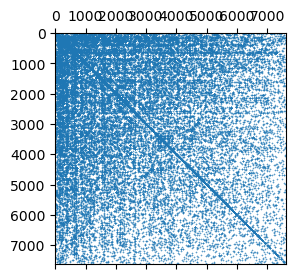

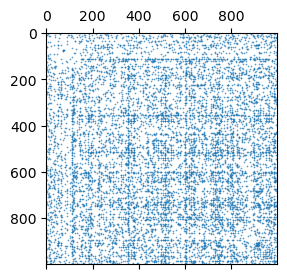

Diâmetro da rede:  15
Periferia da rede:  [1071, 3885, 2287, 2990, 4510]


In [14]:
# Matriz de adjacência
matriz_adj = nx.adjacency_matrix(G)
adj_coo = matriz_adj.tocoo()
plt.figure(figsize=(3,3))
plt.spy(matriz_adj, markersize=0.2)
plt.show()

# Matriz de adjacência do subgrafo
matriz_adj_sub = nx.adjacency_matrix(subgrafo)
adj_coo_sub = matriz_adj_sub.tocoo()
plt.figure(figsize=(3,3))
plt.spy(matriz_adj_sub, markersize=0.2)
plt.show()

# Diâmetro e periferia da rede
print('Diâmetro da rede: ', nx.diameter(G))
print('Periferia da rede: ', nx.periphery(G))

# Valores da densidade da rede

Como calculamos abaixo, o valor de densidade da rede é 0.0009. Isso demonstra uma rede mais esparsa, algo normal em redes sociais. No contexto de nossa rede, isso implica que os usuários não tem uma quantidade muito grande de amigos.

# Valor de assortatividade da rede

O valor de assortatividade da rede é 0.017. Isso significa que a rede é um pouco assortativa, ou seja, nós com um grau alto tendem a se conectar com nós com grau alto e nós com grau baixo tendem a se conectar com nós com grau baixo. Isso é esperado em redes sociais, pois usuários com muitos amigos tendem a se conectar com outros usuários com muitos amigos e usuários com poucos amigos tendem a se conectar com outros usuários com poucos amigos.

In [5]:
# Densidade da rede
print('Densidade da rede: ', nx.density(G))

# Assosritivdade geral da rede
print('Assosritivdade geral da rede: ', nx.degree_assortativity_coefficient(G))

# Densidade do subgrafo
print('Densidade do subgrafo: ', nx.density(subgrafo))

# Assosritivdade geral do subgrafo
print('Assosritivdade geral do subgrafo: ', nx.degree_assortativity_coefficient(subgrafo))

Densidade da rede:  0.0009568849118596328
Assosritivdade geral da rede:  0.01707317256063152
Densidade do subgrafo:  0.00926126126126126
Assosritivdade geral do subgrafo:  0.07254118927242309


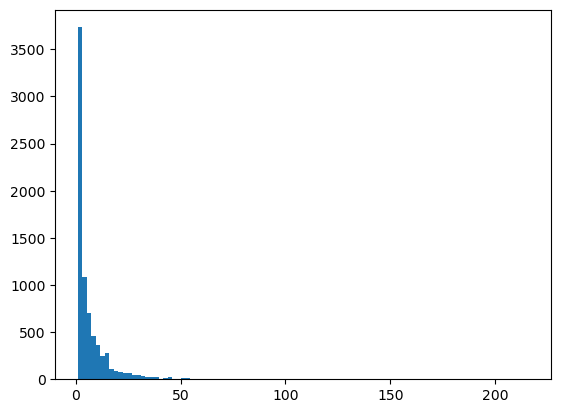

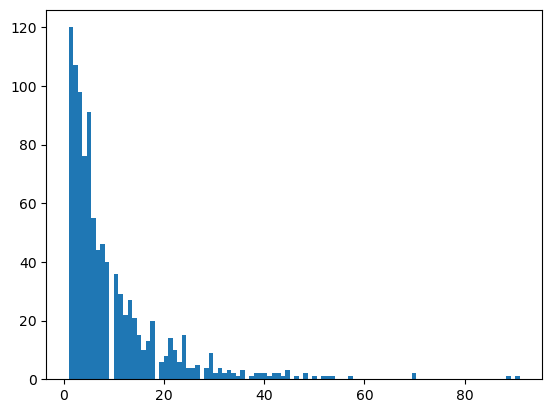

In [16]:
# Visualização do Hisograma de distribuição impírica de grau
graus = [G.degree(n) for n in G.nodes()]
plt.hist(graus, bins=100)
plt.show()

# Visualização do Hisograma de distribuição impírica de grau do subgrafo
graus_sub = [subgrafo.degree(n) for n in subgrafo.nodes()]
plt.hist(graus_sub, bins=100)
plt.show()

# Valor de clustering global e local

O coeficiente de clustering global é 0.21, simbolizando uma rede com um alto coeficiente de clustering. Isso significa que os nós tendem a se conectar com outros nós que já são conectados entre si. Isso é esperado em redes sociais, pois usuários que tem amigos em comum tendem a se conectar.

Para os 100 primeiros nós geramos o coeficiente de clustering local com o valor de 0.18.

# Componentes conectados fortemente e fracamente

Não foi possível calcular essas metrícas por não ser um grafo direcionado.

In [7]:
# Coeficiente de clustering local para os 100 primeiros nós
print('Média do coeficiente de clustering local para os 100 primeiros nós: ', np.mean(list(nx.clustering(G, list(G.nodes())[0:100]).values())))

# Coeficiente de clustering global
print('Coeficiente de clustering global: ', nx.average_clustering(G))

Média do coeficiente de clustering local para os 100 primeiros nós:  0.18024804739895892
Coeficiente de clustering global:  0.2194184243270858


In [9]:
# Calculando valores de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality
eigenvector = nx.eigenvector_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
print('Eigenvector centrality: ', eigenvector)
print('Degree centrality: ', degree)
print('Closeness centrality: ', closeness)
print('Betweenness centrality: ', betweenness)

Eigenvector centrality:  {0: 1.5975689365706297e-06, 747: 6.154499979108227e-05, 1: 0.00013107597395546663, 4257: 4.413415137221785e-05, 2194: 0.0004217279421980089, 580: 3.3969806762461453e-06, 6478: 0.003749366048862973, 1222: 2.407378366362153e-05, 5735: 1.3354388317919195e-05, 7146: 6.240855048742624e-06, 2204: 0.0007797133732390964, 126: 6.646983440719199e-06, 2639: 9.611874657386849e-06, 2: 7.43361375373027e-07, 562: 6.008655110851645e-07, 1492: 9.638772997819502e-07, 6: 1.4681164221796181e-05, 5303: 2.355214483227843e-06, 7128: 7.456872585822179e-06, 4154: 2.3757078010463456e-06, 5179: 1.9640827870533338e-07, 3: 0.00031615295836075907, 1728: 4.12792689210666e-05, 4560: 0.0001472646055852156, 5060: 0.0007591374078291235, 1351: 6.264257280200665e-05, 6503: 8.060182758684208e-05, 7089: 0.0002401321912110204, 4319: 0.0008150739973819275, 6095: 0.0005977957803895684, 272: 9.17161990448441e-06, 4433: 0.0002079028605082835, 2900: 1.180396189703248e-05, 3381: 0.004412449999293955, 5943:

In [10]:
# Valores de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality para a rede
eigenvector_medio = np.mean(list(eigenvector.values()))
degree_medio = np.mean(list(degree.values()))
closeness_medio = np.mean(list(closeness.values()))
betweenness_medio = np.mean(list(betweenness.values()))
print('Eigenvector centrality médio: ', eigenvector_medio)
print('Degree centrality médio: ', degree_medio)
print('Closeness centrality médio: ', closeness_medio)
print('Betweenness centrality médio: ', betweenness_medio)

Eigenvector centrality médio:  0.0019623613571358393
Degree centrality médio:  0.0009568849118596328
Closeness centrality médio:  0.1943856661354511
Betweenness centrality médio:  0.0005552659759794935


In [13]:
# Visualizando os nós importantes usando as métricas de Eigenvector centrality, Degree centrality, Closeness centrality e Betweenness centrality
# Eigenvector centrality
eigenvector_importantes = [k for k, v in eigenvector.items() if v > eigenvector_medio]
print('Eigenvector centrality importantes: ', eigenvector_importantes)
# Degree centrality
degree_importantes = [k for k, v in degree.items() if v > degree_medio]
print('Degree centrality importantes: ', degree_importantes)
# Closeness centrality
closeness_importantes = [k for k, v in closeness.items() if v > closeness_medio]
print('Closeness centrality importantes: ', closeness_importantes)
# Betweenness centrality
betweenness_importantes = [k for k, v in betweenness.items() if v > betweenness_medio]
print('Betweenness centrality importantes: ', betweenness_importantes)

Eigenvector centrality importantes:  [6478, 3381, 5943, 5454, 7589, 2854, 6931, 2412, 1325, 4919, 3103, 17, 6105, 4242, 7237, 1334, 951, 1337, 3165, 1316, 4248, 25, 3544, 28, 7224, 4900, 30, 7075, 2644, 924, 683, 3499, 5564, 5854, 3136, 1300, 3023, 40, 4908, 1381, 1678, 3592, 4335, 2647, 4681, 44, 7042, 3701, 6870, 7226, 6507, 6234, 3597, 3986, 4527, 3360, 4000, 5510, 3400, 2892, 2510, 3038, 645, 7349, 4792, 4638, 2670, 2707, 1611, 6147, 6519, 6621, 81, 4353, 3218, 1555, 1393, 5033, 378, 130, 2014, 3498, 4479, 7352, 3873, 102, 2648, 290, 113, 2452, 3334, 6639, 7507, 4785, 4338, 4039, 6792, 2571, 5644, 398, 4754, 6296, 5402, 3614, 3108, 6695, 3240, 427, 1838, 2488, 7179, 1348, 4809, 2262, 6108, 6369, 5090, 2151, 380, 5866, 2031, 6391, 3961, 763, 7548, 114, 2848, 5817, 3251, 3341, 128, 3042, 136, 2373, 6857, 2186, 5111, 4365, 271, 5392, 4563, 468, 6037, 2361, 4883, 2846, 3504, 2290, 6388, 5944, 7284, 2238, 138, 473, 145, 3133, 5759, 5062, 399, 4880, 4901, 4356, 6232, 7118, 4122, 5831, 18

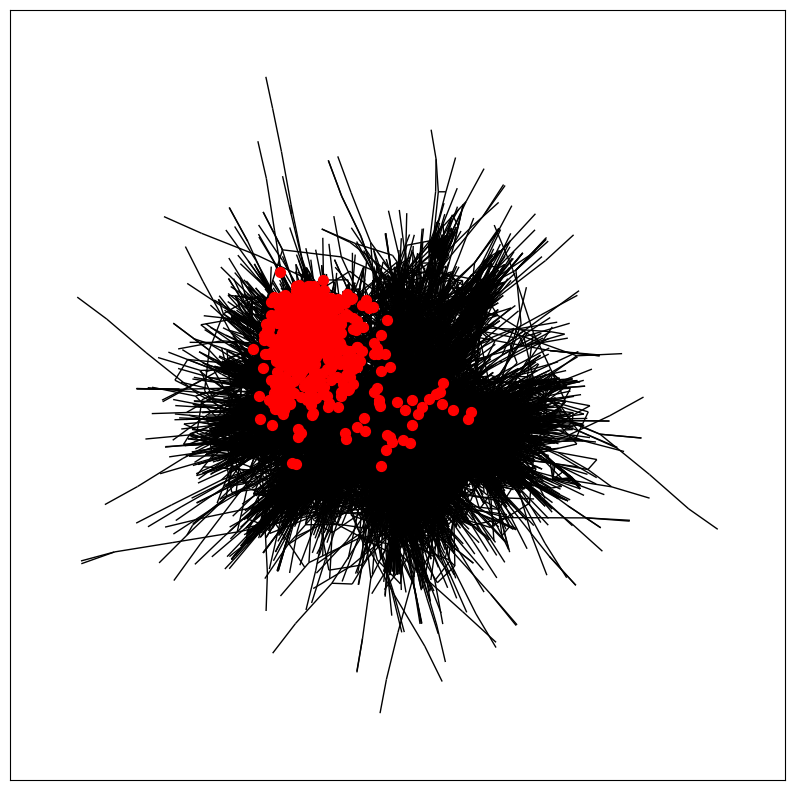

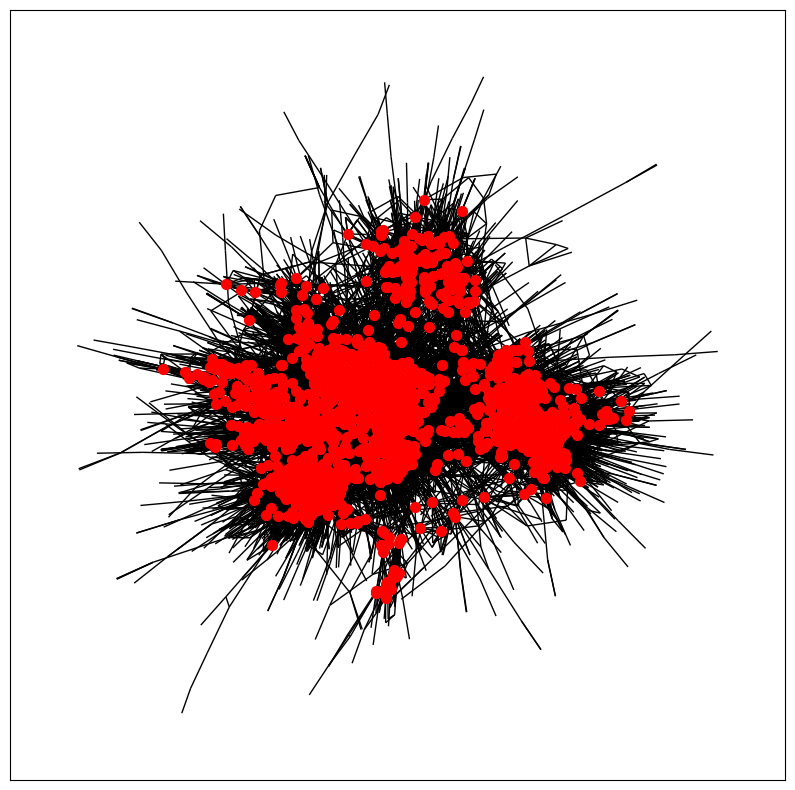

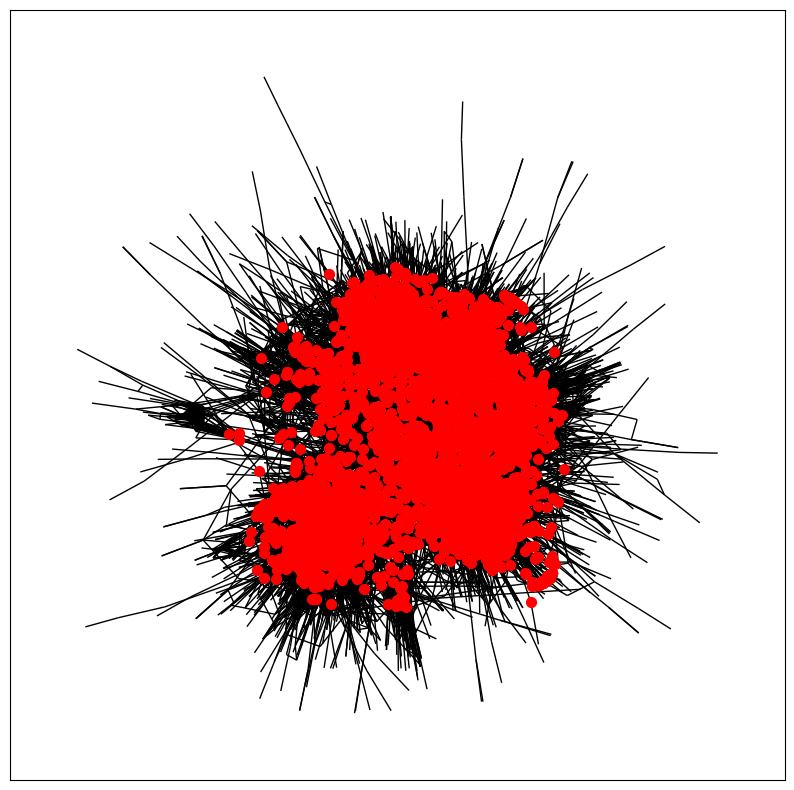

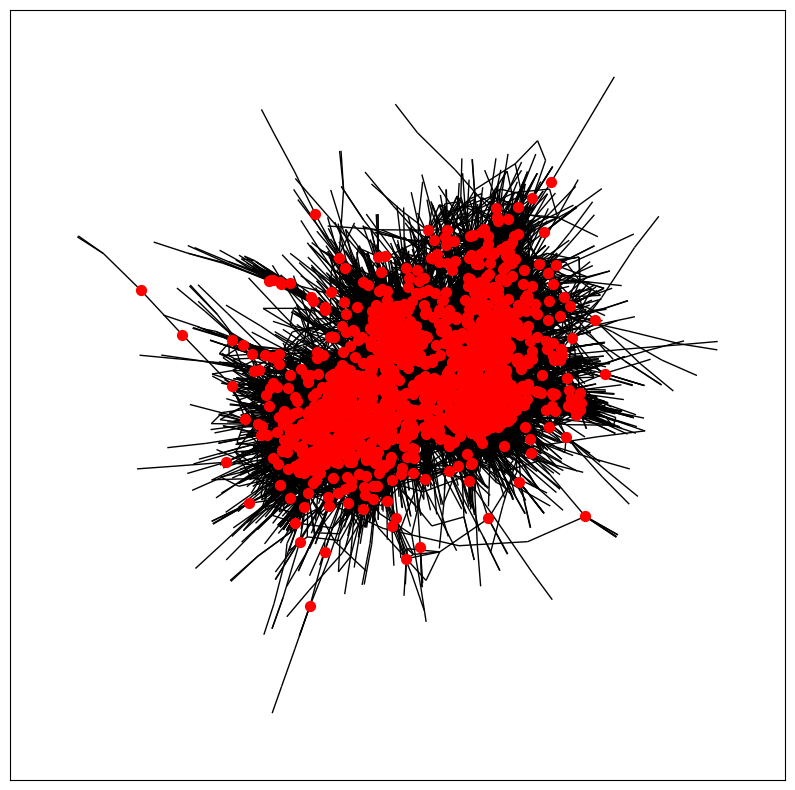

In [14]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G), nodelist=eigenvector_importantes, node_color='r', node_size=50, with_labels=False)
plt.show()

plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G), nodelist=degree_importantes, node_color='r', node_size=50, with_labels=False)
plt.show()

plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G), nodelist=closeness_importantes, node_color='r', node_size=50, with_labels=False)
plt.show()

plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G), nodelist=betweenness_importantes, node_color='r', node_size=50, with_labels=False)
plt.show()